In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix

In [6]:
from sklearn.datasets import load_wine
data = load_wine()
x = data.data
y = data.target

In [8]:
data.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [171]:
data.feature_names


['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [12]:
x

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [14]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

[0 1 1 0 1 1 0 2 1 1 0 1 0 2 0 1 0 0 1 0 1 0 1 1 1 1 1 1 2 2 0 0 2 0 0 0 1
 1 1 0 2 0 1 2 1 2 1 0 2 0 2 2 0 2]
Accuracy: 0.7222222222222222
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.84      0.82        19
           1       0.77      0.77      0.77        22
           2       0.50      0.46      0.48        13

    accuracy                           0.72        54
   macro avg       0.69      0.69      0.69        54
weighted avg       0.72      0.72      0.72        54

Confusion Matrix:
 [[16  1  2]
 [ 1 17  4]
 [ 3  4  6]]
Misclassification Rate: 0.2777777777777778
0.042553191489361764


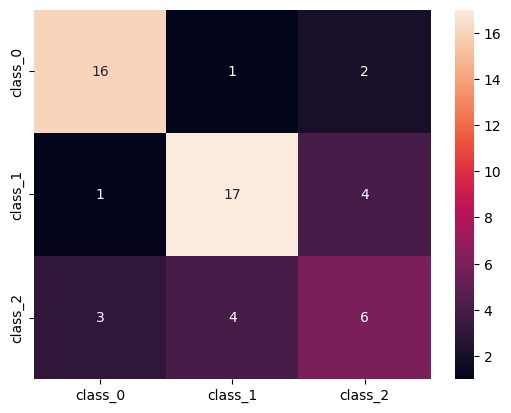

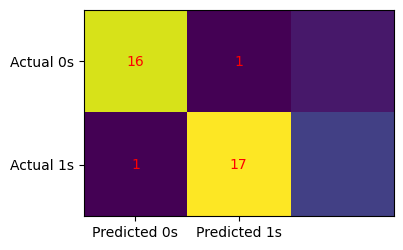

In [155]:
#iteration - 1
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(y_pred)
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)
confusion_matrix_result = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report_result)
print("Confusion Matrix:\n", confusion_matrix_result)
misclassification_rate =1-accuracy
print("Misclassification Rate:", misclassification_rate)
print(r2_score(y_test,y_pred))

import seaborn as sns
ax=plt.subplot()
cdf=pd.DataFrame(confusion_matrix_result)
sns.heatmap(cdf,annot=True)
ax.xaxis.set_ticklabels(data.target_names)
ax.yaxis.set_ticklabels(data.target_names)

cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(4, 4))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

[2 0 2 0 1 0 2 2 1 0 2 2 0 1 0 1 1 1 0 1 0 1 2 1 1 1 1 2 1 0 0 1 2 0 0 0 2
 2 2 1 0 1 1 0 1 0 2 1 2 0 1 0 0 2]
Accuracy: 0.7407407407407407
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89        19
           1       0.75      0.71      0.73        21
           2       0.53      0.57      0.55        14

    accuracy                           0.74        54
   macro avg       0.73      0.73      0.73        54
weighted avg       0.74      0.74      0.74        54

Confusion Matrix:
 [[17  0  2]
 [ 1 15  5]
 [ 1  5  8]]
Misclassification Rate: 0.2592592592592593
0.2931132612407511


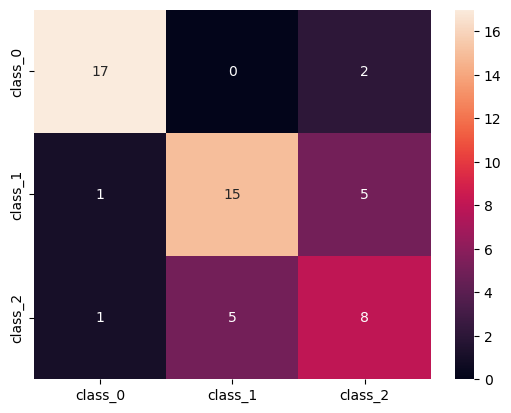

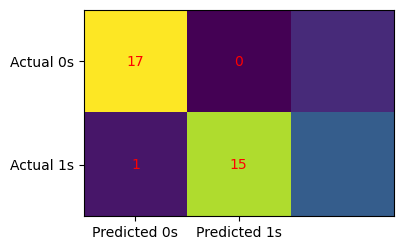

In [157]:
#iteration - 1
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(y_pred)
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)
confusion_matrix_result = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report_result)
print("Confusion Matrix:\n", confusion_matrix_result)
misclassification_rate =1-accuracy
print("Misclassification Rate:", misclassification_rate)
print(r2_score(y_test,y_pred))

import seaborn as sns
ax=plt.subplot()
cdf=pd.DataFrame(confusion_matrix_result)
sns.heatmap(cdf,annot=True)
ax.xaxis.set_ticklabels(data.target_names)
ax.yaxis.set_ticklabels(data.target_names)

cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(4, 4))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

[0 1 1 0 1 1 0 2 1 1 0 1 0 2 0 1 0 0 1 0 1 0 1 1 1 1 1 1 2 2 0 0 2 0 0 0 1
 1 1 0 0 0 1 2 1 0 1 0 0 0 2 2 0 2 0 1 0 0 1 1 1 0 2 2 1 1 1 2 0 2 0 2]
Accuracy: 0.6666666666666666
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.95      0.82        22
           1       0.72      0.68      0.70        31
           2       0.43      0.32      0.36        19

    accuracy                           0.67        72
   macro avg       0.63      0.65      0.63        72
weighted avg       0.65      0.67      0.65        72

Confusion Matrix:
 [[21  1  0]
 [ 2 21  8]
 [ 6  7  6]]
Misclassification Rate: 0.33333333333333337
-0.027522935779816793


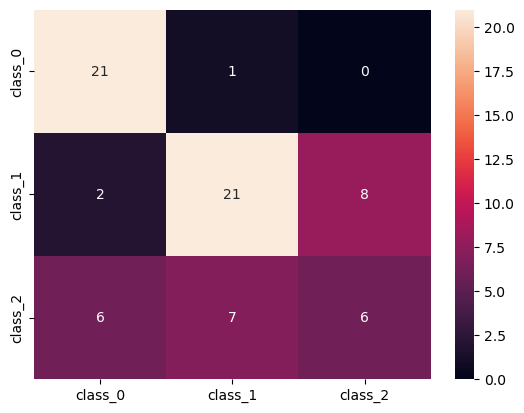

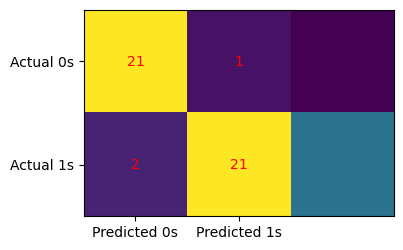

In [159]:
#iteration - 2
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=0)
model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(y_pred)
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)
confusion_matrix_result = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report_result)
print("Confusion Matrix:\n", confusion_matrix_result)
misclassification_rate =1-accuracy
print("Misclassification Rate:", misclassification_rate)
print(r2_score(y_test,y_pred))

import seaborn as sns
ax=plt.subplot()
cdf=pd.DataFrame(confusion_matrix_result)
sns.heatmap(cdf,annot=True)
ax.xaxis.set_ticklabels(data.target_names)
ax.yaxis.set_ticklabels(data.target_names)

cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(4, 4))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

[0 0 1 0 1 0 1 2 2 0 2 2 0 1 0 1 1 1 0 1 0 1 2 1 1 1 1 2 1 0 0 1 0 0 0 0 2
 2 2 1 0 1 1 2 1 0 2 1 2 0 1 0 0 2 1 2 0 0 1 0 1 1 2 2 0 0 0 2 2 0 0 2]
Accuracy: 0.6944444444444444
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.92      0.89        26
           1       0.68      0.63      0.65        27
           2       0.47      0.47      0.47        19

    accuracy                           0.69        72
   macro avg       0.67      0.68      0.67        72
weighted avg       0.69      0.69      0.69        72

Confusion Matrix:
 [[24  0  2]
 [ 2 17  8]
 [ 2  8  9]]
Misclassification Rate: 0.3055555555555556
0.23284236916327183


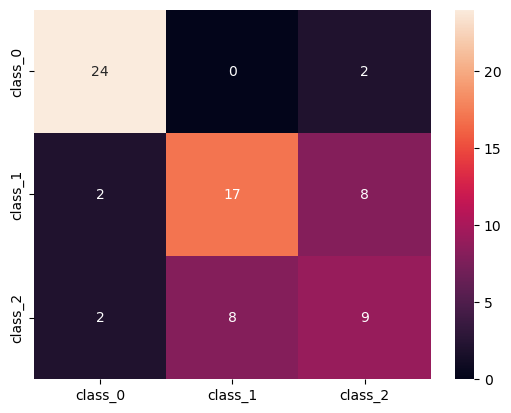

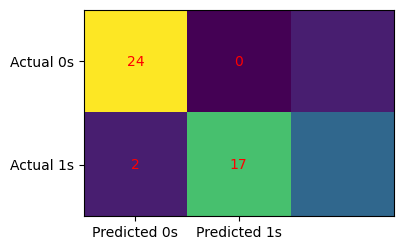

In [161]:
#iteration - 2
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)
model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(y_pred)
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)
confusion_matrix_result = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report_result)
print("Confusion Matrix:\n", confusion_matrix_result)
misclassification_rate =1-accuracy
print("Misclassification Rate:", misclassification_rate)
print(r2_score(y_test,y_pred))

import seaborn as sns
ax=plt.subplot()
cdf=pd.DataFrame(confusion_matrix_result)
sns.heatmap(cdf,annot=True)
ax.xaxis.set_ticklabels(data.target_names)
ax.yaxis.set_ticklabels(data.target_names)

cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(4, 4))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

[0 1 1 0 1 1 0 2 2 1 0 1 0 2 0 1 0 0 1 0 1 0 1 2 2 1 1 1 2 2 0 0 2 0 0 0 2
 1 1 0 0 0 1 2 1 0 1 0 0 0 2 2 0 2 0 1 0 0 1 2 1 0 2 2 1 1 2 2 0 2 0 2 2 0
 2 0 1 2 2 1 1 1 2 0 1 2 1 1 1]
Accuracy: 0.6404494382022472
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.92      0.81        25
           1       0.74      0.57      0.65        40
           2       0.42      0.46      0.44        24

    accuracy                           0.64        89
   macro avg       0.63      0.65      0.63        89
weighted avg       0.65      0.64      0.64        89

Confusion Matrix:
 [[23  1  1]
 [ 3 23 14]
 [ 6  7 11]]
Misclassification Rate: 0.3595505617977528
-0.0818807339449541


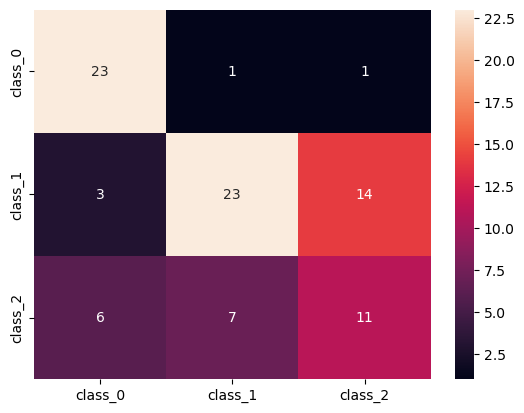

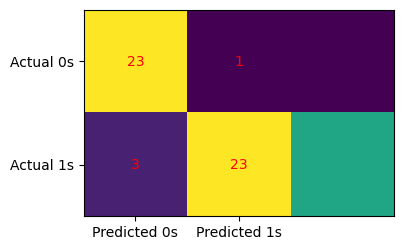

In [163]:
#iteration - 3
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=0)
model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(y_pred)
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)
confusion_matrix_result = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report_result)
print("Confusion Matrix:\n", confusion_matrix_result)
misclassification_rate =1-accuracy
print("Misclassification Rate:", misclassification_rate)
print(r2_score(y_test,y_pred))

import seaborn as sns
ax=plt.subplot()
cdf=pd.DataFrame(confusion_matrix_result)
sns.heatmap(cdf,annot=True)
ax.xaxis.set_ticklabels(data.target_names)
ax.yaxis.set_ticklabels(data.target_names)

cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(4, 4))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

[2 0 1 0 1 0 1 2 2 0 2 1 0 1 0 1 1 1 0 1 0 1 2 1 1 1 1 2 1 0 0 1 2 0 0 0 2
 2 2 1 0 1 1 2 1 0 2 1 2 0 1 0 0 2 1 2 0 1 1 0 1 1 2 2 0 0 0 2 2 0 0 1 1 0
 1 1 0 2 1 1 1 1 0 0 1 2 0 1 2]
Accuracy: 0.6629213483146067
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.82      0.86        33
           1       0.62      0.68      0.65        34
           2       0.41      0.41      0.41        22

    accuracy                           0.66        89
   macro avg       0.64      0.63      0.64        89
weighted avg       0.67      0.66      0.67        89

Confusion Matrix:
 [[27  2  4]
 [ 2 23  9]
 [ 1 12  9]]
Misclassification Rate: 0.3370786516853933
0.1610808546292417


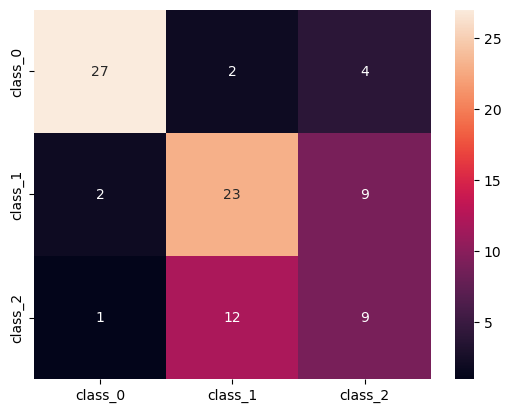

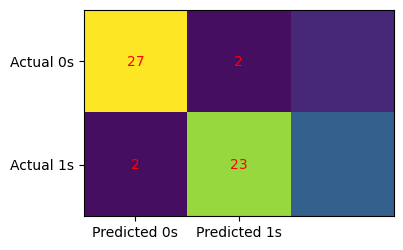

In [165]:
#iteration - 3
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=42)
model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(y_pred)
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)
confusion_matrix_result = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report_result)
print("Confusion Matrix:\n", confusion_matrix_result)
misclassification_rate =1-accuracy
print("Misclassification Rate:", misclassification_rate)
print(r2_score(y_test,y_pred))

import seaborn as sns
ax=plt.subplot()
cdf=pd.DataFrame(confusion_matrix_result)
sns.heatmap(cdf,annot=True)
ax.xaxis.set_ticklabels(data.target_names)
ax.yaxis.set_ticklabels(data.target_names)

cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(4, 4))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()